In [ ]:
!pwd

In [1]:
import torch
print(torch.__version__)  # PyTorch version
print(torch.version.cuda)  # CUDA version used by PyTorch
print(torch.cuda.is_available())  # Check if CUDA is enabled

1.12.1+cu113
11.3
True


/home/dsu.local/bshakya/.conda/envs/sahi/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
import yolox

In [15]:
!pip install -r ./sahi_yolox/requirements.txt

In [16]:
!pip install loguru

In [17]:
from sahi_yolox.sahi.model import YoloXDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [4]:
config_file_template = '''

#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Copyright (c) Megvii, Inc. and its affiliates.

import os

from yolox.exp import Exp as MyExp


class Exp(MyExp):
    def __init__(self):
        super(Exp, self).__init__()
        self.depth = 0.67
        self.width = 0.75
        self.exp_name = os.path.split(os.path.realpath(__file__))[1].split(".")[0]
'''

with open('test_config.py', 'w') as f:
    f.write(config_file_template)


In [18]:
CLASSES = (
    "pedestrian",
    "people",
    "bicycle",
    "car",
    "van",
    "truck",
    "tricycle",
    "awning-tricycle",
    "bus",
    "motor",
    "others",
    "ignore",
)

In [19]:
chkpt_file = "sahi_yolox/weights/latest_ckpt.pth"
config_path = "test_config"

In [27]:
detection_model = YoloXDetectionModel(
    model_path=chkpt_file,
    config_path = config_path,
    device="cuda:0",
    confidence_threshold=0.3,
    nms_threshold=0.4,
    image_size = (640,640),
    classes=CLASSES
)

In [32]:
result = get_prediction("sahi_yolox/demo/demo_data/visdrone-test/0000006_00159_d_0000001.jpg", detection_model)

In [31]:
!pwd

/mmfs1/scratch/dsu.local/bshakya/scratch/bshakya/YOLOX


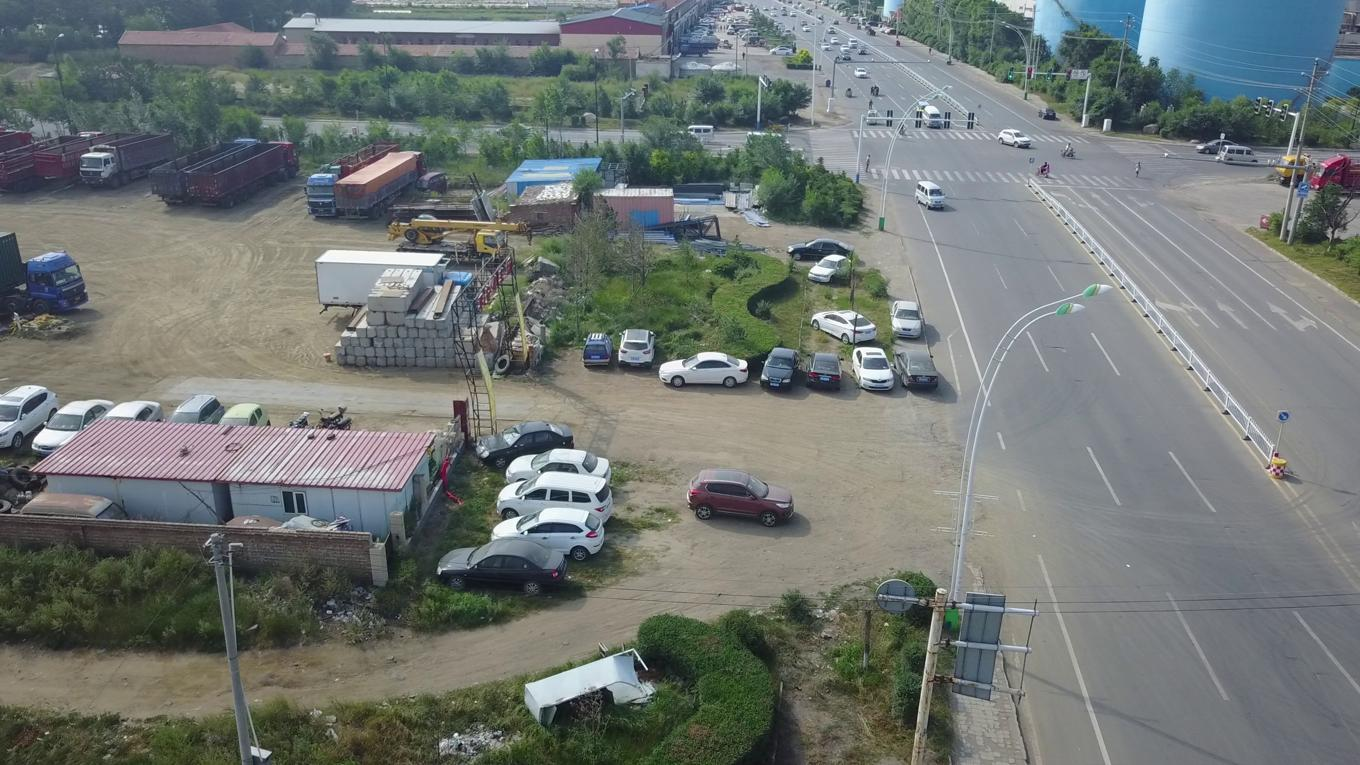

In [34]:
result.export_visuals(export_dir="sahi_yolox/demo/demo_data/visdrone-test_out/")
Image("sahi_yolox/demo/demo_data/visdrone-test/0000006_00159_d_0000001.jpg")

In [13]:
result = get_sliced_prediction(
    "sahi_yolox/demo/demo_data/bev-car5.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 6 slices.


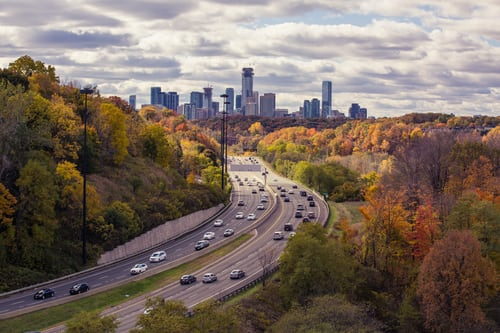

In [14]:
result.export_visuals(export_dir="sahi_yolox/demo/demo_data/")
Image("sahi_yolox/demo/demo_data/bev-car5.jpeg")

In [1]:
pwd

'/mmfs1/scratch/dsu.local/bshakya/scratch/bshakya/sahi'

In [2]:
!pip install -U torch sahi ultralytics

Defaulting to user installation because normal site-packages is not writeable
  Using cached sahi-0.11.20-py3-none-any.whl.metadata (17 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia

In [4]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import cv2
print(cv2.getBuildInformation())



General configuration for OpenCV 4.9.0 =====================================
  Version control:               4.9.0

  Platform:
    Timestamp:                   2023-12-31T11:19:01Z
    Host:                        Linux 5.15.0-1053-azure x86_64
    CMake:                       3.28.1
    CMake generator:             Unix Makefiles
    CMake build tool:            /bin/gmake
    Configuration:               Release

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 FP16 AVX AVX2 AVX512_SKX
      requested:                 SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (16 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      FP16 (0 files):            + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 AVX
      AVX (8 files):             + SSSE3 SSE4_1 POPCNT SSE4_2 AVX
      AVX2 (36 files):           + SSSE3 SSE4_1 POPCNT SSE4_2 FP16 FMA3 AVX AVX2
  

In [ ]:
!pip uninstall opencv-python opencv-python-headless
#!pip install opencv-python-headless

In [14]:
!pip install opencv-python-headless[qt]

Defaulting to user installation because normal site-packages is not writeable


In [17]:
!export QT_DEBUG_PLUGINS=1
!python3 ./scripts/tiling.py

Frame width: 1280
frame height: 720
Slice Height:  512
Slice Weight:  512
Image Height:  720
Image Width: 1280
No of tiles: 6

0: 640x640 126 persons, 31 bicycles, 5 cars, 2 motorcycles, 11 airplanes, 2 buss, 3 trains, 3 boats, 30 traffic lights, 1 fire hydrant, 6 stop signs, 2 parking meters, 3 benchs, 2 birds, 12 dogs, 1 horse, 4 elephants, 1 zebra, 2 giraffes, 1 backpack, 7 handbags, 2 ties, 1 frisbee, 6 skiss, 6 sports balls, 3 kites, 5 baseball bats, 5 baseball gloves, 1 surfboard, 3 wine glasss, 1 fork, 1 knife, 5 bananas, 3 oranges, 2 carrots, 1 donut, 7.6ms
Speed: 4.7ms preprocess, 7.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 dog, 1 horse, 48 umbrellas, 45 kites, 152 baseball bats, 53 baseball gloves, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 15 dogs, 21 horses, 4 sheeps, 52 umbrellas, 30 handbags, 33 kites, 98 baseball bats, 47 baseball gloves, 7.9ms
Speed: 1.7ms pre